<a href="https://colab.research.google.com/github/Giogia/Machine-Learning-Project-2018-2019/blob/master/Let's%20play%20with%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Functions for imgs plotting

In [2]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  
"""
#If you want to use it, move after fitting section
predictions = model.predict(test_img)
test_img_print = test_img[:,:,:,0]

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_img_print)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
"""

'\n#If you want to use it, move after fitting section\npredictions = model.predict(test_img)\ntest_img_print = test_img[:,:,:,0]\n\n# Plot the first X test images, their predicted label, and the true label\n# Color correct predictions in blue, incorrect predictions in red\nnum_rows = 5\nnum_cols = 3\nnum_images = num_rows*num_cols\nplt.figure(figsize=(2*2*num_cols, 2*num_rows))\nfor i in range(num_images):\n  plt.subplot(num_rows, 2*num_cols, 2*i+1)\n  plot_image(i, predictions, test_labels, test_img_print)\n  plt.subplot(num_rows, 2*num_cols, 2*i+2)\n  plot_value_array(i, predictions, test_labels)\nplt.show()\n'

In [0]:
def randomize(a, b):
    # Generate the permutation index array.
    s = np.arange(a.shape[0])
    np.random.shuffle(s)
    # Shuffle the arrays by giving the permutation in the square brackets.
    shuffled_a = a[s]
    shuffled_b = b[s]
    return shuffled_a, shuffled_b

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

train_img, train_labels = randomize(train_img, train_labels)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

"""plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()"""

train_img = train_img / 255.0
test_img = test_img / 255.0

limit = int(len(train_img)*0.2)

eval_img = train_img[:limit]
eval_labels = train_labels[:limit]

train_img = train_img[limit:]
train_labels = train_labels[limit:]



"""
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
"""

4423680/4422102 [==============================] - 0s 0us/step


'\nplt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(train_images[i], cmap=plt.cm.binary)\n    plt.xlabel(class_names[train_labels[i]])\nplt.show()\n'

In [5]:

img_x, img_y = 28, 28

train_img = train_img.reshape(train_img.shape[0], img_x, img_y, 1)
eval_img = eval_img.reshape(eval_img.shape[0], img_x, img_y, 1)
test_img = test_img.reshape(test_img.shape[0], img_x, img_y, 1)
input_shape=(img_x, img_y, 1)

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=input_shape),
    keras.layers.Activation(tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(64, (5, 5)),
    keras.layers.Activation(tf.nn.relu),
    keras.layers.SpatialDropout2D(0.5),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(tf.nn.relu),
    keras.layers.Dense(10),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
batch_size = 128
epochs = 200
lr_dec = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='auto', baseline=None, restore_best_weights=True)

logs = model.fit(train_img, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(eval_img, eval_labels),
          callbacks=[lr_dec, early_stop]
         )

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
48000/48000 [==============================] - 10s 200us/sample - loss: 0.7517 - acc: 0.8009 - val_loss: 0.8665 - val_acc: 0.8701
Epoch 2/200
48000/48000 [==============================] - 6s 119us/sample - loss: 0.4765 - acc: 0.8676 - val_loss: 0.3849 - val_acc: 0.8903
Epoch 3/200
48000/48000 [==============================] - 6s 118us/sample - loss: 0.3971 - acc: 0.8813 - val_loss: 0.3591 - val_acc: 0.8849
Epoch 4/200
48000/48000 [==============================] - 6s 122us/sample - loss: 0.3537 - acc: 0.8886 - val_loss: 0.2875 - val_acc: 0.9071
Epoch 5/200
48000/48000 [==============================] - 6s 121us/sample - loss: 0.3242 - acc: 0.8943 - val_loss: 0.2859 - val_acc: 0.9045
Epoch 6/200
48000/48000 [==============================] - 6s 119us/sample - loss: 0.3032 - acc: 0.8997 - val_loss: 0.2736 - val_acc: 0.9075
Epoch 7/200
48000/48000 [==============================

In [7]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('Test accuracy:', test_acc, " Test loss:", test_loss)

10000/10000 [==============================] - 1s 107us/sample - loss: 0.2316 - acc: 0.9169
Test accuracy: 0.9169  Test loss: 0.23157818270921707


In [0]:
history = logs.history
loss = history['loss']
acc = history['acc']
val_loss = history['val_loss']
val_acc = history['val_acc']
results = [(loss,'Training Loss'), (acc,'Training Accuracy'), (val_loss,'Validation Loss'), (val_acc,'Validation Accuracy')]

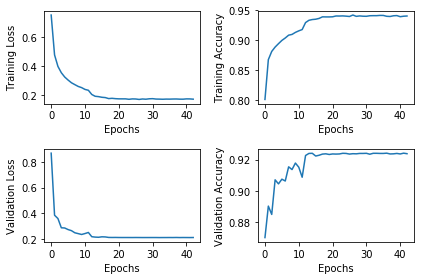

In [9]:
for i in range(len(results)):
  plt.subplot(2,2,i+1)
  plt.plot(range(0, len(results[i][0])), np.array(results[i][0]))
  plt.xlabel('Epochs')
  plt.ylabel(results[i][1])
plt.tight_layout()
plt.show()